In [311]:
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

import tensorflow as tf
# Bibliothek für grafische Darstellung laden
import matplotlib.pyplot as plt
from PIL import Image #Image library Pillow
# Funktion für zufällige Bildauswahl laden
from random import randint
import os
import numpy as np
import json 
import pandas as pd

In [312]:
# check if tensorflow is running on gpu
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [313]:
# Datensätze laden
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [314]:
labels = ["T-shirt/Top", "Hose", "Pullover", "Kleid", "Mantel", "Sandalen", "Hemd", "Sneaker", "Tasche", "Halbschuhe"]

trainingsdaten:
60000
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205 

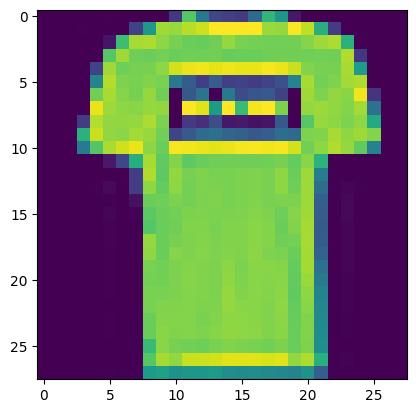

In [315]:
#Kennenlernen er Datensätze
print ("trainingsdaten:")
print (len(train_images))
print(train_images[1])
img_no = 1
# Bild zeigen
plt.figure()
print(train_labels[img_no])
plt.imshow(train_images[img_no])
plt.grid(False)
plt.show()

In [316]:
path = "./data/images" 
if not os.path.isdir(path):
    os.makedirs(path)

In [317]:
%%script false --no-raise-error

for i in range(0,100):
    im = Image.fromarray(train_images[i])
    real = train_labels[i]
    im.save(path + "/%d_%d.png" % (i, real))


In [318]:
%%script false --no-raise-error

i = Image.open(path + "/0/1.png")
print(np.array(i))

In [319]:
%%script false --no-raise-error

for i in range(len(train_images)):
    im = Image.fromarray(train_images[i])
    label = train_labels[i]
    if not os.path.isdir(path+ "/%s" % label):
        os.makedirs(path + "/%s" % label)
    im.save(path + "/%s/%d.png" % (label, i))


In [320]:
train_images = train_images.astype("float32") / 255
print(train_images.shape, "train samples")
test_images = test_images.astype("float32") / 255

(60000, 28, 28) train samples


In [321]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
print(train_images.shape)

(60000, 28, 28, 1)


In [322]:
num_classes = 10

# convert class vectors (the labels) to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels_untouched = test_labels #use this to leave the labels untouched
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [323]:
%%script false --no-raise-error
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print(train_images)

In [372]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SpatialDropout2D(0.3))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [373]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 spatial_dropout2d_5 (Spatia  (None, 5, 5, 64)         0         
 lDropout2D)                                                     
                                                     

In [374]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [375]:
batch_size = 128
epochs = 50

#model = keras.models.load_model('/data/model.mdl')
#model.load_weights("/data/model.h5")


early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
422/422 [==============================] - 8s 15ms/step - loss: 0.6100 - accuracy: 0.7779 - val_loss: 0.4445 - val_accuracy: 0.8278
Epoch 2/50
422/422 [==============================] - 6s 13ms/step - loss: 0.4182 - accuracy: 0.8475 - val_loss: 0.3452 - val_accuracy: 0.8707
Epoch 3/50
422/422 [==============================] - 5s 13ms/step - loss: 0.3623 - accuracy: 0.8694 - val_loss: 0.3130 - val_accuracy: 0.8855
Epoch 4/50
422/422 [==============================] - 5s 13ms/step - loss: 0.3300 - accuracy: 0.8821 - val_loss: 0.2924 - val_accuracy: 0.8917
Epoch 5/50
422/422 [==============================] - 5s 13ms/step - loss: 0.3063 - accuracy: 0.8882 - val_loss: 0.2912 - val_accuracy: 0.8915
Epoch 6/50
422/422 [==============================] - 5s 13ms/step - loss: 0.2904 - accuracy: 0.8932 - val_loss: 0.2686 - val_accuracy: 0.8970
Epoch 7/50
422/422 [==============================] - 5s 13ms/step - loss: 0.2739 - accuracy: 0.8995 - val_loss: 0.2630 - val_accuracy: 0.9025

Text(0, 0.5, 'Accuracy [%]')

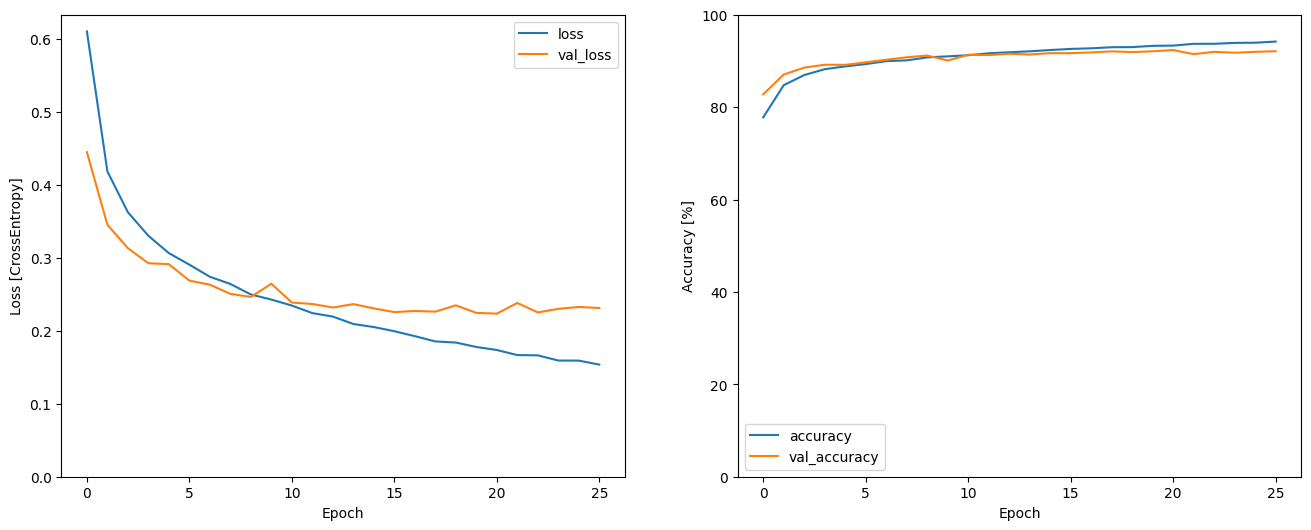

In [376]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [377]:
score = model.evaluate(test_images, test_labels, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 2s - loss: 0.2432 - accuracy: 0.9196 - 2s/epoch - 6ms/step
Test loss: 0.24318057298660278
Test accuracy: 0.9196000099182129


In [378]:
pred = model.predict(test_images)
print(pred[1]) #Prediction for image 1
pred_1 = np.argmax(pred[1])
print(labels[pred_1], pred_1)
print(labels[test_labels_untouched[1]])

313/313 [==============================] - 2s 4ms/step
[4.1831863e-06 7.8193196e-14 9.9998689e-01 5.9856375e-10 8.6028285e-06
 2.1718613e-13 3.3417095e-07 2.5242780e-15 9.4409494e-11 5.7383148e-12]
Pullover 2
Pullover


In [379]:
counter = 0
for i in range(0,10000):
    pred_i = np.argmax(pred[i]) # get the position of the highest value within the list
    if test_labels_untouched[i] != pred_i: 
        counter += 1
print("Fails: ", counter)

Fails:  804


5
Sandalen


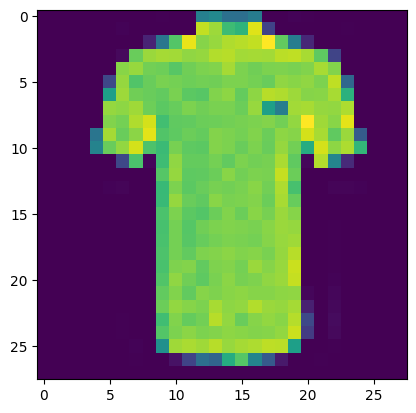

In [ ]:
zahl = 1200   
print(test_labels_untouched[zahl])
print(labels[test_labels_untouched[zahl]])

plt.imshow(train_images[zahl])
plt.show()

In [371]:
model.save('./data/save/model.mdl')
model.save_weights("./data/save/model.h5")

INFO:tensorflow:Assets written to: ./data/save/model.mdl\assets


INFO:tensorflow:Assets written to: ./data/save/model.mdl\assets


In [ ]:
weights = model.get_weights()
j =json.dumps(pd.Series(weights).to_json(orient='values'), indent=3)
print(j)

"""
model = keras.models.load_model('/home/albert/model.mdl')
model.load_weights("/home/albert/model.h5")
"""

model_json = model.to_json()
print (model_json)
